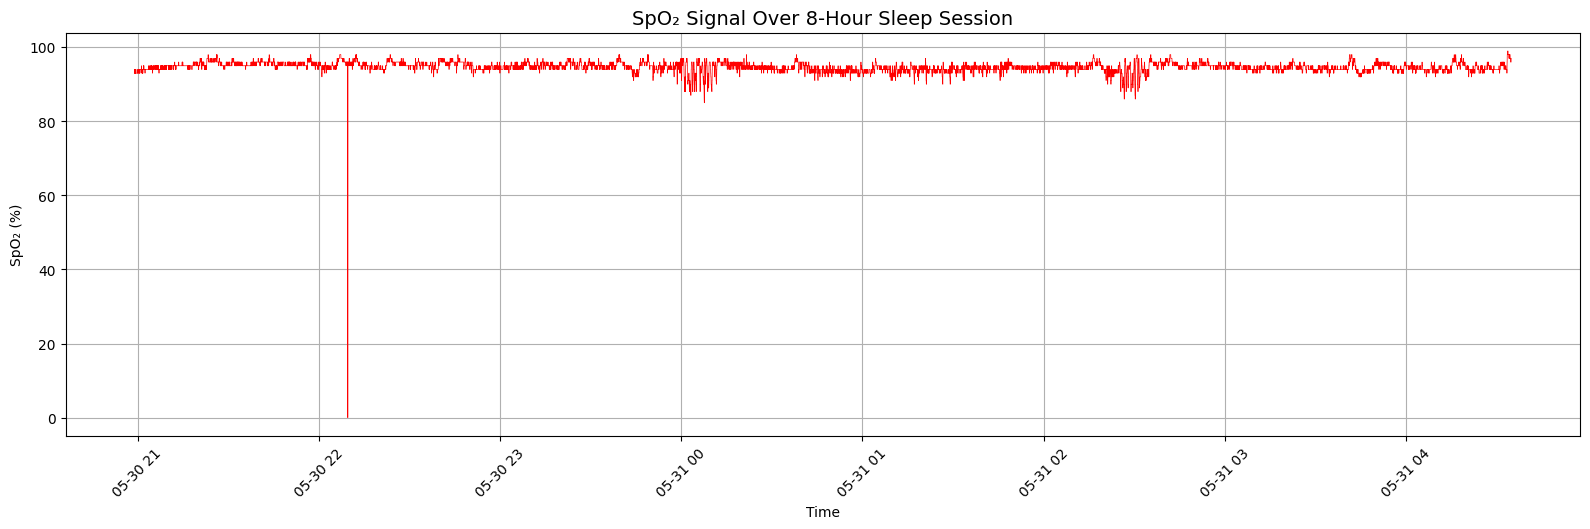

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# --- File path ---
file_path = "SPO2 - 30-05-2024.txt" # Update with full path if needed

# --- Load and parse data ---
with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# --- Find start of actual data ---
start_idx = next(i for i, line in enumerate(lines) if line.strip().startswith("Data:")) + 1
data_lines = lines[start_idx:]

# --- Parse timestamps and values ---
timestamps = []
values = []

for line in data_lines:
    if ';' in line:
        try:
            ts_str, val_str = line.strip().split(';')
            timestamp = datetime.strptime(ts_str.strip(), "%d.%m.%Y %H:%M:%S,%f")
            value = int(val_str.strip())
            timestamps.append(timestamp)
            values.append(value)
        except ValueError:
            continue  # skip malformed lines

# --- Create DataFrame ---
df = pd.DataFrame({
    'timestamp': timestamps,
    'spo2': values
})

# --- Plotting ---
plt.figure(figsize=(16, 5))
plt.plot(df['timestamp'], df['spo2'], color='red', linewidth=0.5)
plt.title("SpO₂ Signal Over 8-Hour Sleep Session", fontsize=14)
plt.xlabel("Time")
plt.ylabel("SpO₂ (%)")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
